### Problem Statement


The attached data is relates to an attrition problem of a company. Study the data very carefully. The variables are self explanatory. Start by identiyfing the variable types of the variables. This will help you to understand the kind of data exploration techniques you must use.

Each row in the dataset represent an employee. Every employee corresponds to a value of the variable "Attrition". A value of attirion = 1 indicte that the employee has left the company. In the same way, attirion = 0 would indicate that the employee has left the company. 

Your task will be to find 5 most important factors which you feel affects attiion.


### Data Dictionary



| Variables                      	| Type                       	| Description                                                                                     	|
|--------------------------------	|----------------------------	|-------------------------------------------------------------------------------------------------	|
|     Age                        	|     Numeric Discrete     	|     Age of the Employees varies between 18-60 years                                             	|
|     Attrition                  	|     Categorical Binary     	|     Whether the Employee has resigned from his position ? (Y/N)                                 	|
|     BusinessTravel             	|     Categorical Nominal    	|     How often does the Employee is sent on Business Travel? (Rarely/   Frequently/No Travel)    	|
|     Department                 	|     Categorical Nominal    	|     Department which the employee belongs to (Sales / R&D / HR)                                 	|
|     EducationField             	|     Categorical Nominal    	|     Field of Education (Life Science/Medical/Marketing/Technical   Degree/HR)                   	|
|     EnvironmentSatisfaction    	|     Categorical Ordinal    	|     Employee Rating of the Work Environment (Scale of 1 to 4)                                   	|
|     Gender                     	|     Categorical Nominal    	|     Male/Female                                                                                 	|
|     JobInvolvement             	|     Categorical Ordinal    	|     Employee Rating of the Work Environment (Scale of 1 to 4)                                   	|
|     JobLevel                   	|     Categorical Ordinal    	|     Position of the employee in the Business Vertical ( 1 to 5 where 5   is Senior Position)    	|
|     JobSatisfaction            	|     Categorical Ordinal    	|     Employee Rating of their Job Satisfaction (Scale of 1 to 4)                                 	|
|     MaritalStatus              	|     Categorical Nominal    	|     Single / Married / Divorced                                                                 	|
|     MonthlyIncome              	|     Numeric Continuous     	|     Monthly Income received by the employees                                                    	|
|     OverTime                   	|     Categorical Binary     	|     Whether the Employee was asked to work Overtime ? (Y/N)                                     	|
|     TotalWorkingYears          	|     Numeric Discrete       	|     Total Work Experience of the Employee varies between 0-40 years                             	|
|     WorkLifeBalance            	|     Categorical Ordinal    	|     Employee Rating of Work Life Balance (Scale of 1 to 4)                                      	|
|     YearsAtCompany             	|     Numeric Discrete       	|     Total time spent by the employee in the company varies between   0-40 years                 	|
|     YearsInCurrentRole         	|     Numeric Discrete       	|     Number of years spent in Current Role varies between 0-18 years                             	|
|     YearsSinceLastPromotion    	|     Numeric Discrete       	|     Number of years since the Employee recieved a Promotion varies   between 0 - 15             	|
|     YearsWithCurrManager       	|     Numeric Discrete       	|     Number of years under the Current Manager varies between 0-17   years                       	|
|     DistanceFromHome           	|     Numeric Continous      	|     Distance from Home to Work in kms varies between 1- 29km                                    	|

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from imblearn.over_sampling import SMOTE,ADASYN

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

C:\Softwares\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import Dataset

In [2]:
os.chdir(r'C:\Anirudha\Projects\Praxis\IML\Attrition Dataset')
data = pd.read_csv('attrition.csv')
data.head()
cat_vars = ['BusinessTravel','Department','EducationField','Gender','MaritalStatus','OverTime',
            'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','WorkLifeBalance']
num_vars = ['Age','MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
           'YearsSinceLastPromotion','YearsWithCurrManager','DistanceFromHome']

In [3]:
print("Total Employees :", len(data))
print("\nAttrition Rate : %.2f" % round(len(data[data["Attrition"] == 1])/len(data)*100,2))
print("\nShape of the data:",data.shape)
print("\nInfo about all the Data and datatypes:\n" )
data.info()

Total Employees : 1470

Attrition Rate : 16.12

Shape of the data: (1470, 21)

Info about all the Data and datatypes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Employee ID              1470 non-null   int64 
 1   Age                      1470 non-null   int64 
 2   Attrition                1470 non-null   int64 
 3   BusinessTravel           1470 non-null   object
 4   Department               1470 non-null   object
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   Gender                   1470 non-null   object
 8   JobInvolvement           1470 non-null   int64 
 9   JobLevel                 1470 non-null   int64 
 10  JobSatisfaction          1470 non-null   int64 
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            14

In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Employee ID,1470,NaN,NaN,NaN,735.5,424.497,1,368.25,735.5,1102.75,1470
Age,1470,NaN,NaN,NaN,36.9238,9.13537,18,30,36,43,60
Attrition,1470,NaN,NaN,NaN,0.161224,0.367863,0,0,0,0,1
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,1470,NaN,NaN,NaN,2.72177,1.09308,1,2,3,4,4
Gender,1470,2,Male,882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobInvolvement,1470,NaN,NaN,NaN,2.72993,0.711561,1,2,3,3,4
JobLevel,1470,NaN,NaN,NaN,2.06395,1.10694,1,1,2,3,5


In [5]:
data.head()

,Employee ID,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,1,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,...,Single,5993,Yes,8,1,6,4,0,5,1
1,2,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,...,Married,5130,No,10,3,10,7,1,7,8
2,3,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,...,Single,2090,Yes,7,3,0,0,0,0,2
3,4,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,...,Married,2909,Yes,8,3,8,7,3,0,3
4,5,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,...,Married,3468,No,6,3,2,2,2,2,2


### Univariate Analysis

#### a) Numeric Data


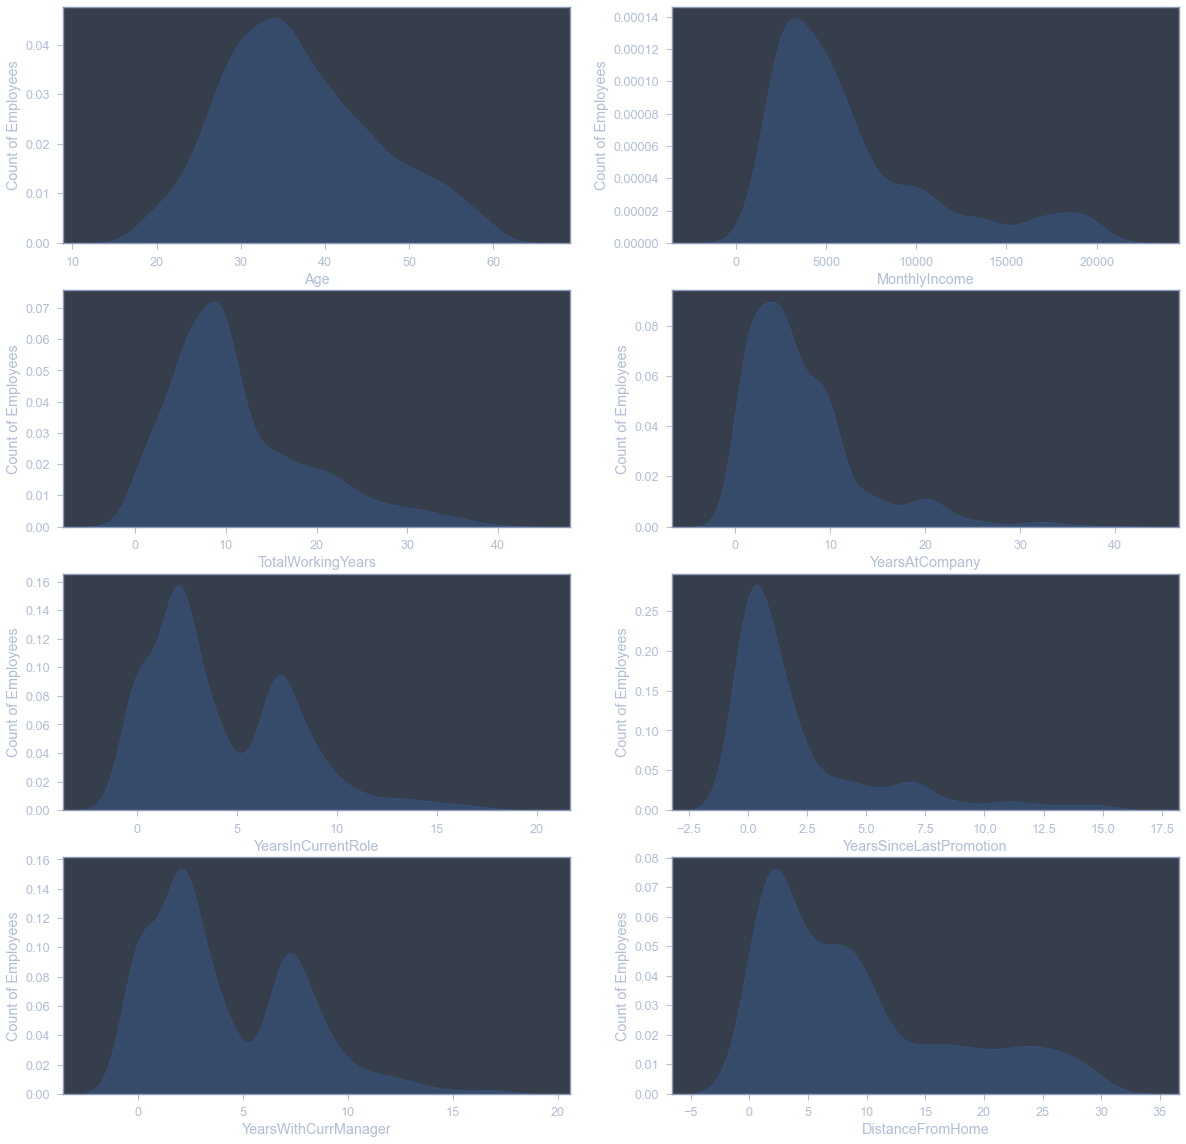

In [6]:
plt.figure(figsize= (20,20))
for i in range(len(num_vars)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data[num_vars[i]],shade= True)
    plt.xlabel(num_vars[i])
    plt.ylabel("Count of Employees")

#### b) Categorical Data

ValueError: num must be 1 <= num <= 10, not 11

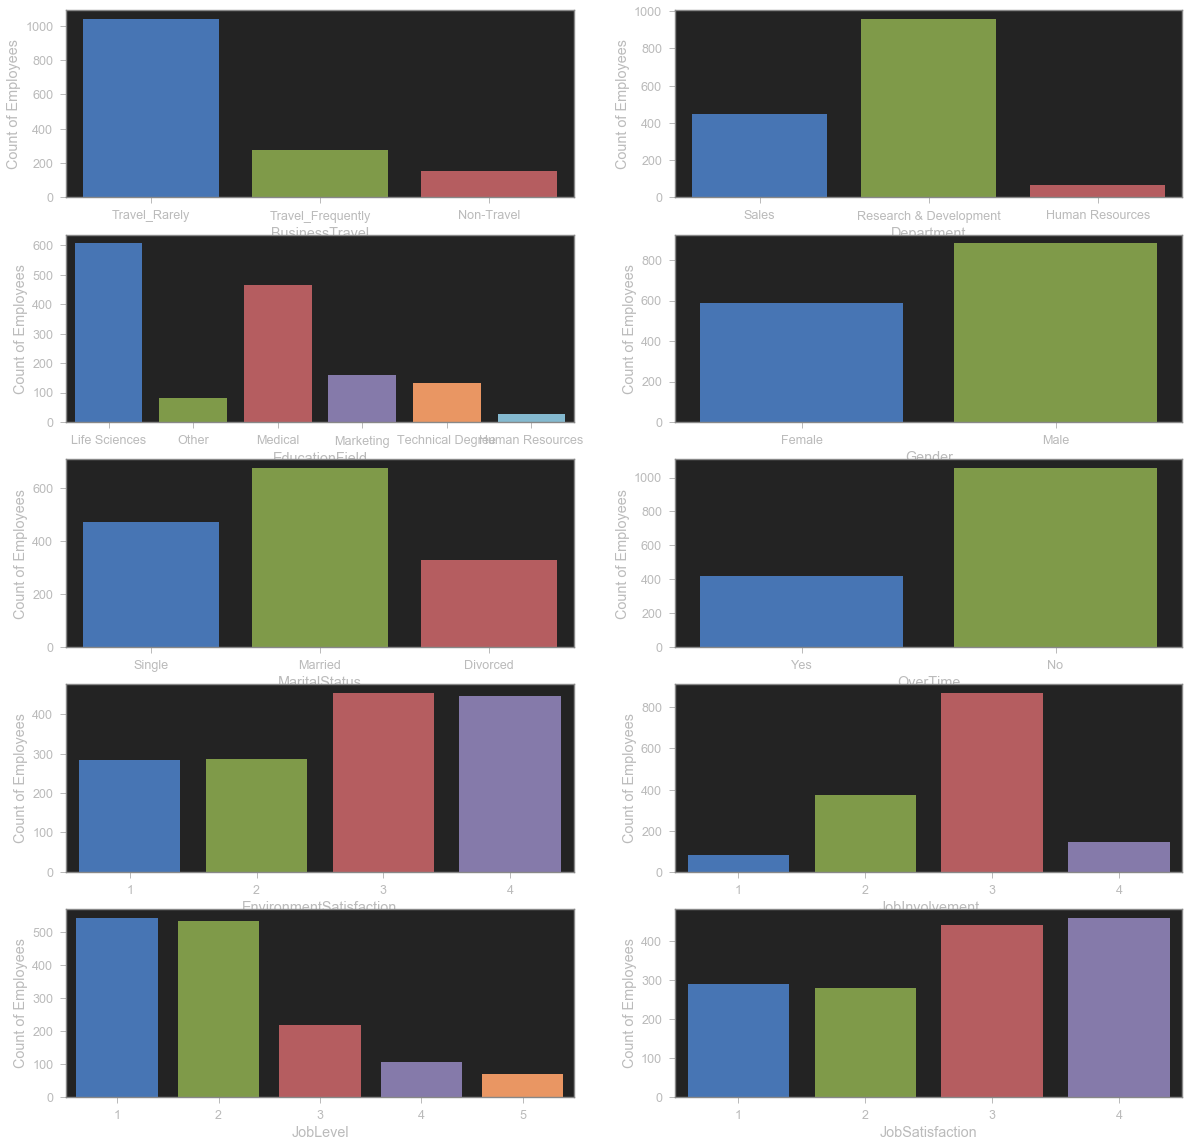

In [480]:
plt.figure(figsize= (20,20))
for i in range(len(cat_vars)):
    plt.subplot(5,2,i+1)
    sns.countplot(data[cat_vars[i]])
    plt.xlabel(cat_vars[i])
    plt.ylabel("Count of Employees")

### Bivariate Analysis
Continous vs Continous - scatter plot, correlation matrix
Categorical vs Categorical- 
two way table , stacked bar , Chi- Squared Test
Categorical vs Categorical - T-test,Z-Test, ANOVA


#### a) Numeric Data

In [504]:
data.groupby("Attrition")[num_vars].agg([np.mean,np.std])

Age          MonthlyIncome              TotalWorkingYears  \
                mean      std          mean          std              mean   
Attrition                                                                    
0          37.561233  8.88836   6832.739659  4818.208001         11.862936   
1          33.607595  9.68935   4787.092827  3640.210367          8.244726   

                    YearsAtCompany           YearsInCurrentRole            \
                std           mean       std               mean       std   
Attrition                                                                   
0          7.760719       7.369019  6.096298           4.484185  3.649402   
1          7.169204       5.130802  5.949984           2.902954  3.174827   

          YearsSinceLastPromotion           YearsWithCurrManager            \
                             mean       std                 mean       std   
Attrition                                                                    
0                        2.234388  3.234762             4.367397  3.594116   
1                        1.945148  3.153077             2.852321  3.143349   

          DistanceFromHome            
                      mean       std  
Attrition                             
0                 8.915653  8.012633  
1                10.632911  8.452525

In [ ]:
plt.figure(figsize= (25,25))
for i in range(8):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data[data["Attrition"] == 0][num_vars[i]].dropna(), color = "green")
    sns.kdeplot(data[data["Attrition"] == 1][num_vars[i]].dropna(), color = "red")
    plt.xlabel(num_vars[i])
    plt.ylabel("Count of Employees")

####  b) Categorical Data

In [481]:
data.groupby("Attrition")[cat_vars].agg([np.mean,np.std])

EnvironmentSatisfaction           JobInvolvement            \
                             mean       std           mean       std   
Attrition                                                              
0                        2.771290  1.071132       2.770479  0.692050   
1                        2.464135  1.169791       2.518987  0.773405   

           JobLevel           JobSatisfaction           WorkLifeBalance  \
               mean       std            mean       std            mean   
Attrition                                                                 
0          2.145985  1.117933        2.778589  1.093277        2.781022   
1          1.637131  0.940594        2.468354  1.118058        2.658228   

                     
                std  
Attrition            
0          0.681907  
1          0.816453

In [482]:
data.groupby("BusinessTravel").mean()       

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
BusinessTravel,,,,,,,,,,,,,,
Non-Travel,36.620000,0.080000,2.733333,2.633333,2.040000,2.793333,6261.946667,10.593333,2.773333,7.146667,4.353333,2.386667,4.300000,9.760000
Travel_Frequently,36.454874,0.249097,2.693141,2.736462,2.014440,2.790614,6193.725632,11.083032,2.776173,7.173285,4.241877,2.342960,4.216606,9.277978
Travel_Rarely,37.092042,0.149569,2.727709,2.742090,2.080537,2.702780,6619.707574,11.430489,2.755513,6.944391,4.208054,2.117929,4.072867,9.088207


In [483]:
data.groupby("Department").mean()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
Department,,,,,,,,,,,,,,
Human Resources,37.809524,0.190476,2.682540,2.746032,2.031746,2.603175,6654.507937,11.555556,2.920635,7.238095,3.539683,1.777778,3.666667,8.698413
Research & Development,37.042664,0.138398,2.744017,2.741935,1.977107,2.726327,6281.252862,11.342352,2.725286,6.864724,4.155047,2.137357,4.084287,9.144641
Sales,36.542601,0.206278,2.679372,2.701794,2.255605,2.751121,6959.172646,11.105381,2.816143,7.284753,4.486547,2.354260,4.271300,9.365471


In [484]:
data.groupby("EducationField").mean()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
EducationField,,,,,,,,,,,,,,
Human Resources,37.037037,0.259259,2.666667,2.740741,2.148148,2.555556,7241.148148,11.592593,2.740741,6.777778,3.555556,1.629630,3.370370,9.037037
Life Sciences,37.107261,0.146865,2.689769,2.732673,2.052805,2.797030,6463.288779,11.245875,2.727723,6.993399,4.308581,2.178218,4.138614,8.955446
Marketing,37.924528,0.220126,2.723270,2.691824,2.358491,2.654088,7348.584906,11.855346,2.798742,7.559748,4.490566,2.245283,4.465409,10.106918
Medical,36.838362,0.135776,2.687500,2.747845,2.040948,2.691810,6510.036638,11.564655,2.762931,7.105603,4.088362,2.295259,4.062500,9.353448
Other,35.365854,0.134146,3.012195,2.695122,1.987805,2.743902,6071.548780,10.353659,2.853659,6.243902,3.975610,1.658537,3.951220,8.926829
Technical Degree,36.121212,0.242424,2.818182,2.719697,1.871212,2.659091,5758.303030,10.250000,2.810606,6.590909,4.340909,2.227273,4.113636,8.810606


In [485]:
data.groupby("Gender").mean()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
Gender,,,,,,,,,,,,,,
Female,37.329932,0.147959,2.721088,2.714286,2.117347,2.683673,6686.566327,11.726190,2.763605,7.231293,4.413265,2.294218,4.256803,9.210884
Male,36.653061,0.170068,2.722222,2.740363,2.028345,2.758503,6380.507937,10.981859,2.759637,6.859410,4.106576,2.116780,4.034014,9.180272


In [486]:
data.groupby("MaritalStatus").mean()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
MaritalStatus,,,,,,,,,,,,,,
Divorced,37.489297,0.100917,2.755352,2.752294,2.140673,2.697248,6786.287462,11.807339,2.749235,7.302752,4.35474,2.155963,4.217125,9.110092
Married,37.757801,0.124814,2.695394,2.751857,2.124814,2.716196,6793.671620,11.732541,2.756315,7.307578,4.48737,2.377415,4.251114,9.459138
Single,35.336170,0.255319,2.736170,2.682979,1.923404,2.768085,5889.472340,10.263830,2.776596,6.374468,3.77234,1.938298,3.874468,8.868085


<Figure size 1800x1800 with 0 Axes>

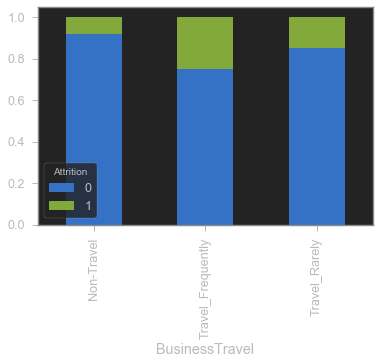

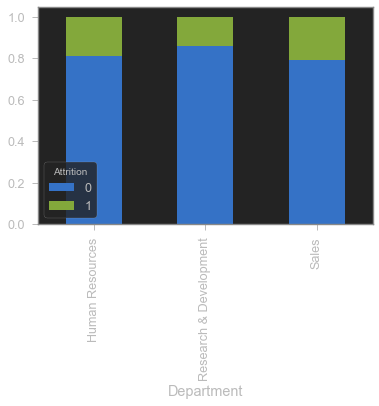

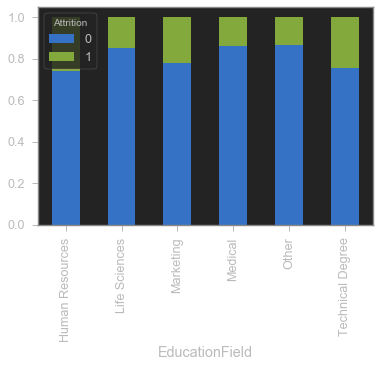

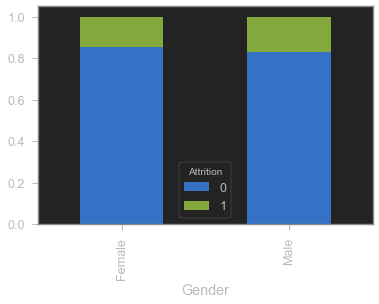

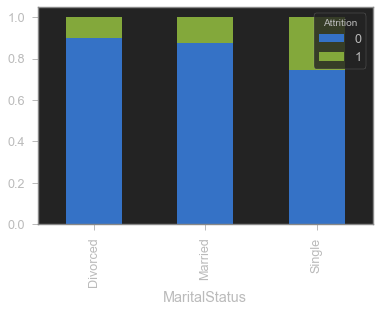

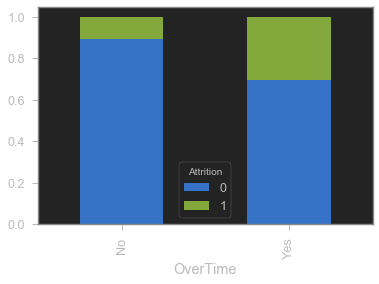

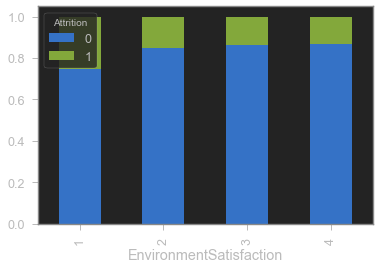

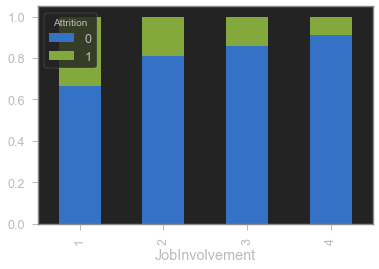

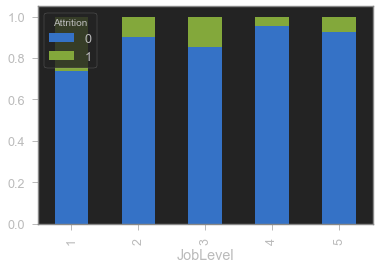

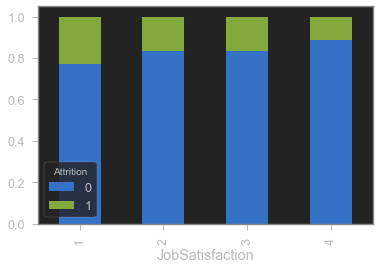

In [487]:
plt.figure(figsize= (25,25))
for i in range(10):
    fig, ax = plt.subplots()
    table = pd.crosstab(data[cat_vars[i]],data["Attrition"])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax= ax)

In [488]:
for i in range(len(cat_vars)):
    print("\nNormalized Value Counts of " + cat_vars[i] + " vs Attrition :\n")
    print(round(pd.crosstab(data.Attrition,columns= data[cat_vars[i]],normalize= 'columns'),2))


Normalized Value Counts of BusinessTravel vs Attrition :

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                     0.92               0.75           0.85
1                     0.08               0.25           0.15

Normalized Value Counts of Department vs Attrition :

Department  Human Resources  Research & Development  Sales
Attrition                                                 
0                      0.81                    0.86   0.79
1                      0.19                    0.14   0.21

Normalized Value Counts of EducationField vs Attrition :

EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
0                          0.74           0.85       0.78     0.86   0.87   
1                          0.26           0.15       0.22     0.14   0.13   

EducationField  Technical Degree  
Att

### Multivariate Analysis

#### a) Numeric Data

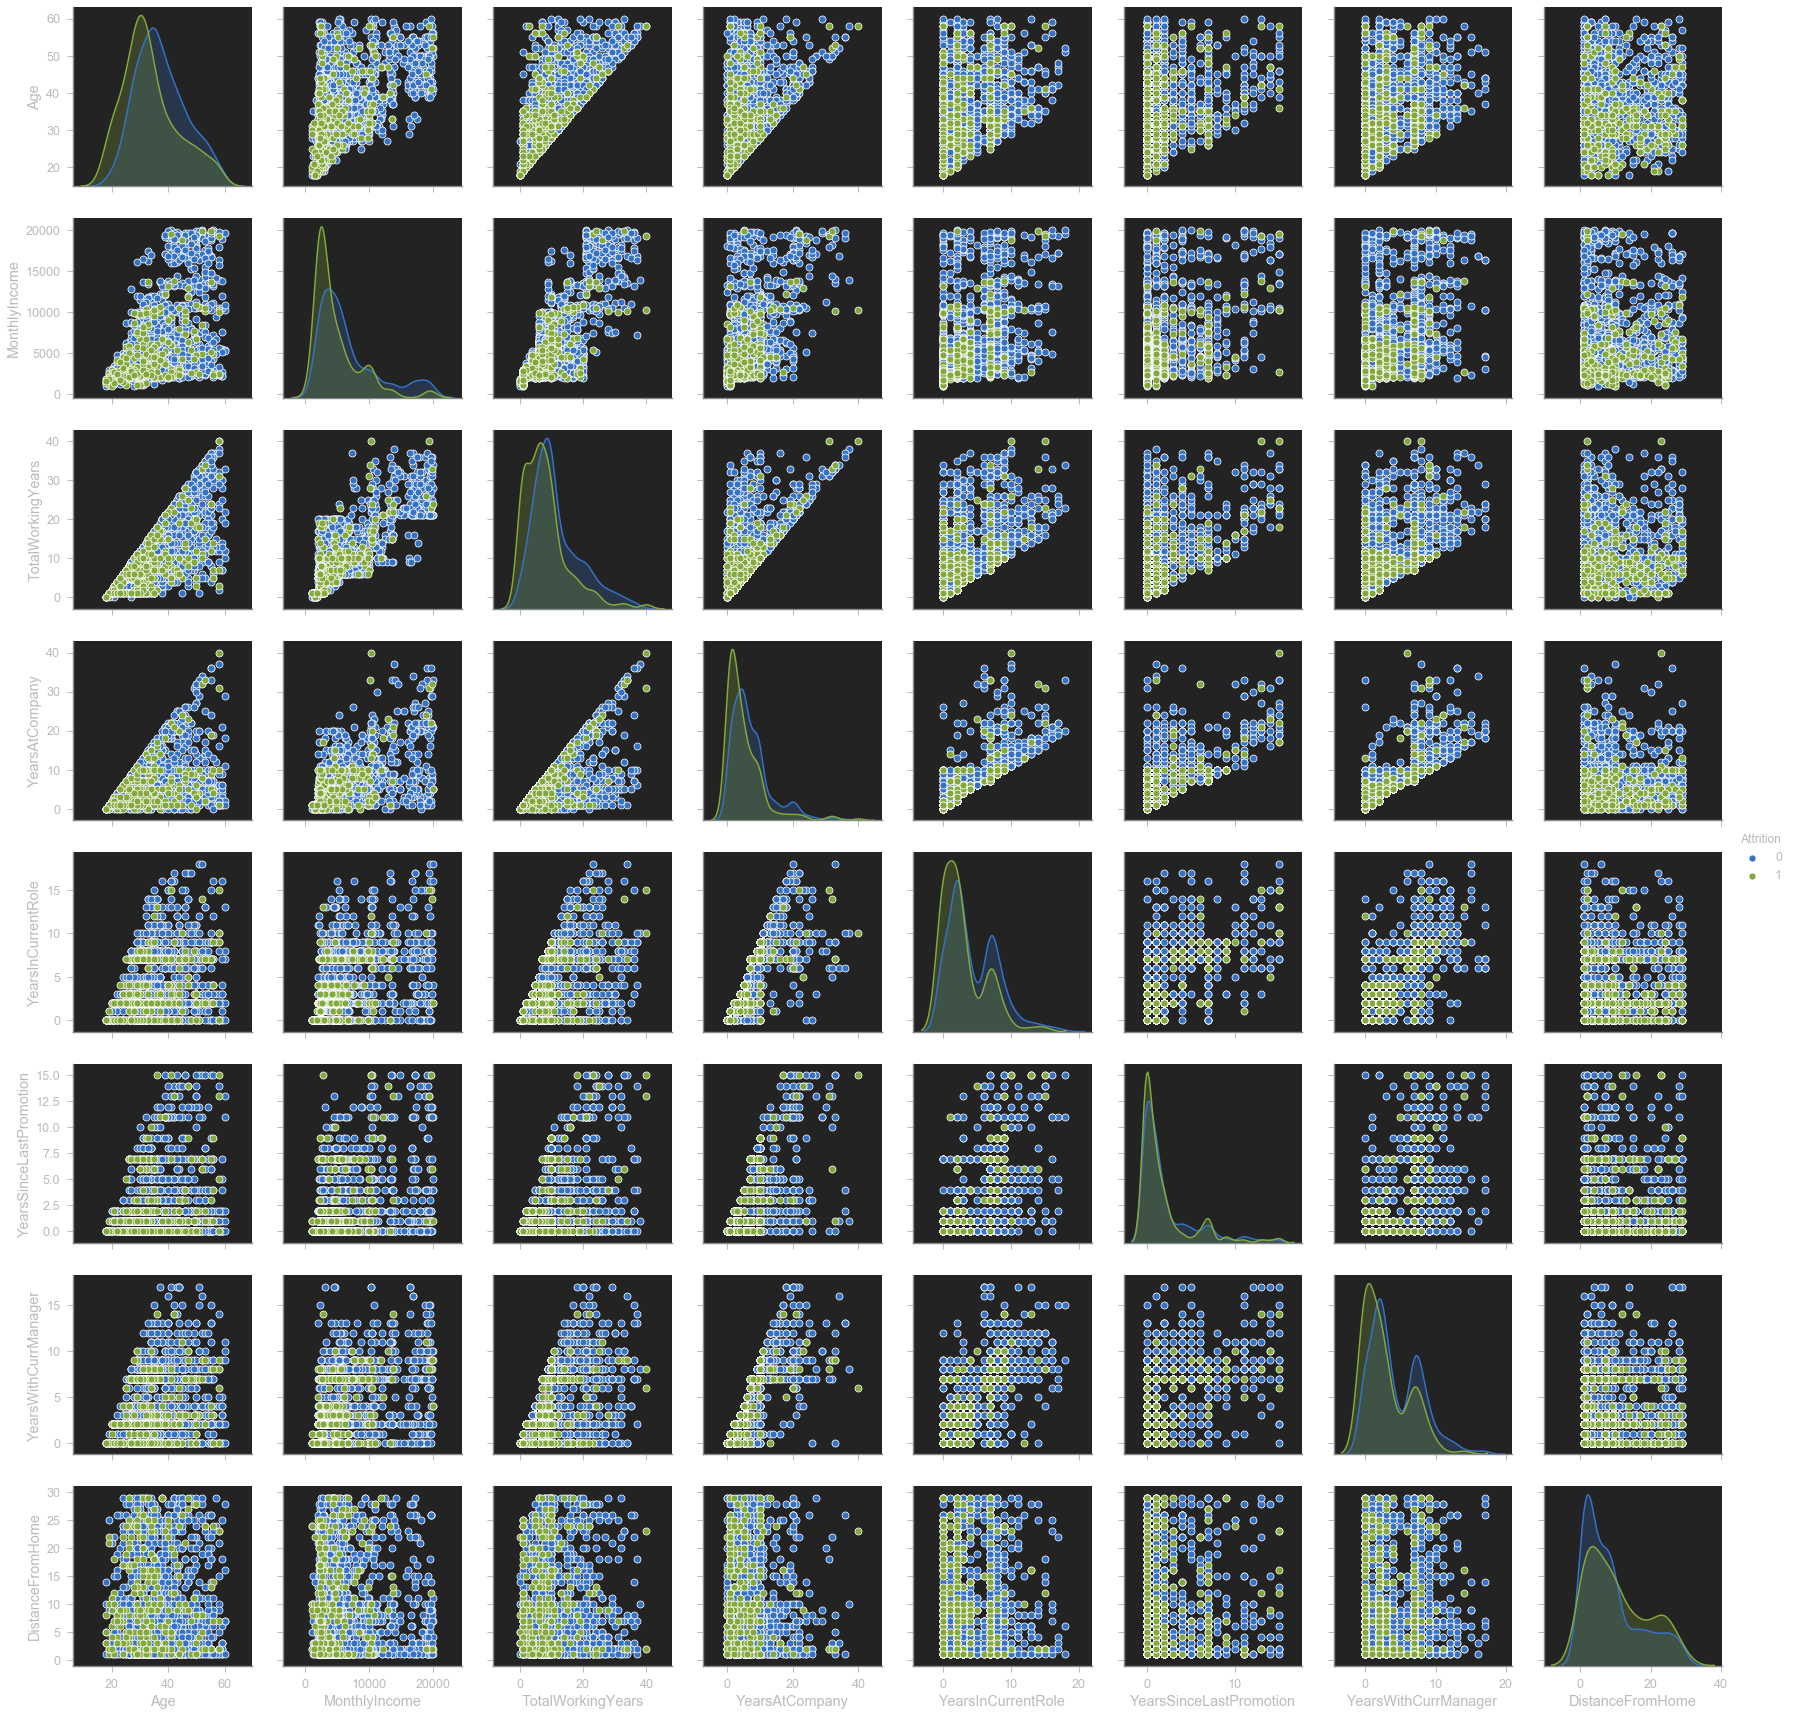

In [489]:
sns.pairplot(data, hue="Attrition",vars= num_vars, height= 3)

#### b) Categorical Data

In [490]:
deptVars = ['EducationField','BusinessTravel','Gender','OverTime','JobLevel']
for i in range(len(deptVars)):
    print("\nContigency Table of " + deptVars[i] + " vs Departments :\n")
    print(round(pd.crosstab(data.Department,columns= data[deptVars[i]],normalize= 'index'),2))


Contigency Table of EducationField vs Departments :

EducationField          Human Resources  Life Sciences  Marketing  Medical  \
Department                                                                   
Human Resources                    0.43           0.25       0.00     0.21   
Research & Development             0.00           0.46       0.00     0.38   
Sales                              0.00           0.34       0.36     0.20   

EducationField          Other  Technical Degree  
Department                                       
Human Resources          0.05              0.06  
Research & Development   0.07              0.10  
Sales                    0.03              0.08  

Contigency Table of BusinessTravel vs Departments :

BusinessTravel          Non-Travel  Travel_Frequently  Travel_Rarely
Department                                                          
Human Resources               0.10               0.17           0.73
Research & Development        0.10          

In [ ]:
jobVars = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance']
for i in range(len(jobVars)):
    print("\nContigency Table of " + jobVars[i] + " vs Departments :\n")
    print(round(pd.crosstab(data.Department,columns= data[jobVars[i]],normalize= 'index'),2))

### Encoding Categorical Data

#### Using Dummy Variables

In [495]:
for i in cat_vars[0:6]:
    dummy_data = pd.get_dummies(data[i],prefix= i + "_" ,drop_first= False)
    data = pd.concat([data,dummy_data],axis=1)
    data = data.drop(i,axis=1)
data.head()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,...,EducationField__Medical,EducationField__Other,EducationField__Technical Degree,Gender__Female,Gender__Male,MaritalStatus__Divorced,MaritalStatus__Married,MaritalStatus__Single,OverTime__No,OverTime__Yes
0,41,1,2,3,2,4,5993,8,1,6,...,0,0,0,1,0,0,0,1,0,1
1,49,0,3,2,2,2,5130,10,3,10,...,0,0,0,0,1,0,1,0,1,0
2,37,1,4,2,1,3,2090,7,3,0,...,0,1,0,0,1,0,0,1,0,1
3,33,0,4,3,1,3,2909,8,3,8,...,0,0,0,1,0,0,1,0,0,1
4,27,0,1,3,1,2,3468,6,3,2,...,1,0,0,0,1,0,1,0,1,0


### Handling Imbalanced Classes

#### SMOTE - Synthetic Minority Over Sampling Technique

In [468]:
X = data.loc[:, data.columns != 'Attrition']
Y = data.loc[:, data.columns == 'Attrition']

os = SMOTE(random_state=0) 
os_data_X,os_data_Y=os.fit_sample(X, Y)
os_data_X = pd.DataFrame(data=os_data_X,columns=X.columns )
os_data_Y= pd.DataFrame(data=os_data_Y,columns=['Attrition'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Attrition = '0' in oversampled data:",len(os_data_Y[os_data_Y['Attrition']==0]))
print("Number of Attrition = '1' in oversampled data:",len(os_data_Y[os_data_Y['Attrition']==1]))
print("Proportion of Attrition = '0':",len(os_data_Y[os_data_Y['Attrition']==0])/len(os_data_X))
print("Proportion of Attrition = '1':",len(os_data_Y[os_data_Y['Attrition']==1])/len(os_data_X))

length of oversampled data is  2466
Number of Attrition = '0' in oversampled data: 1233
Number of Attrition = '1' in oversampled data: 1233
Proportion of Attrition = '0': 0.5
Proportion of Attrition = '1': 0.5


#### ADASYN - Adaptive Synthetic Sampling

In [496]:
X = data.loc[:, data.columns != 'Attrition']
Y = data.loc[:, data.columns == 'Attrition']

os = ADASYN(random_state=0) 
os_data_X,os_data_Y=os.fit_sample(X, Y)
os_data_X = pd.DataFrame(data=os_data_X,columns=X.columns )
os_data_Y= pd.DataFrame(data=os_data_Y,columns=['Attrition'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Attrition = '0' in oversampled data:",len(os_data_Y[os_data_Y['Attrition']==0]))
print("Number of Attrition = '1' in oversampled data:",len(os_data_Y[os_data_Y['Attrition']==1]))
print("Proportion of Attrition = '0':",len(os_data_Y[os_data_Y['Attrition']==0])/len(os_data_X))
print("Proportion of Attrition = '1':",len(os_data_Y[os_data_Y['Attrition']==1])/len(os_data_X))

length of oversampled data is  2419
Number of Attrition = '0' in oversampled data: 1233
Number of Attrition = '1' in oversampled data: 1186
Proportion of Attrition = '0': 0.5097147581645308
Proportion of Attrition = '1': 0.4902852418354692


### Feature Selection

#### Recursive Feature Elimination

In [497]:
cols = data.columns.values.tolist()
y_cols = ['Attrition']
x_cols = [i for i in cols if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg,18)
rfe = rfe.fit(X,Y.values.ravel())
filtered_columns = [i for indx,i in enumerate(x_cols) if rfe.support_[indx]]
print("Selected Features :\n" , filtered_columns)

Selected Features :
 ['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'BusinessTravel__Non-Travel', 'BusinessTravel__Travel_Frequently', 'BusinessTravel__Travel_Rarely', 'Department__Human Resources', 'Department__Sales', 'EducationField__Human Resources', 'EducationField__Marketing', 'EducationField__Technical Degree', 'Gender__Female', 'Gender__Male', 'MaritalStatus__Married', 'MaritalStatus__Single', 'OverTime__No', 'OverTime__Yes']


### Model Tuning , Fitting and Predicting

#### Logistic Regression

In [498]:
X=os_data_X[filtered_columns]
Y=os_data_Y['Attrition']
logit_model = sm.Logit(Y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.550844
         Iterations 6
                                  Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.205      
Dependent Variable:       Attrition             AIC:                   2700.9818  
Date:                     2020-10-01 10:41      BIC:                   2805.2218  
No. Observations:         2419                  Log-Likelihood:        -1332.5    
Df Model:                 17                    LL-Null:               -1676.3    
Df Residuals:             2401                  LLR p-value:           3.8425e-135
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           6.0000                                                  
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------

#### Fitting and Predicting

In [499]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.89


### Performance Measure

#### Confusion Matrix

In [500]:
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[298  11]
 [ 57 239]]


#### Precision and Recall

In [501]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       309
           1       0.96      0.81      0.88       296

    accuracy                           0.89       605
   macro avg       0.90      0.89      0.89       605
weighted avg       0.90      0.89      0.89       605



#### Receiver Operating Characteristics

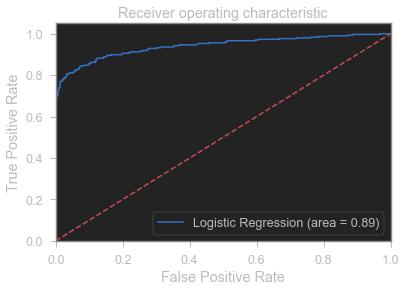

In [502]:
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()